In [1]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [13]:
df = pd.read_csv("FlavorSense.csv")
df

,age,sleep_cycle,exercise_habits,climate_zone,historical_cuisine_exposure,preferred_taste
0,56.0,Irregular,Heavy,Temperate,NaN,Salty
1,NaN,Night Owl,Heavy,Temperate,Asian,Sweet
2,46.0,Night Owl,Heavy,Cold,Mixed,Sour
3,32.0,Early Bird,Heavy,Cold,Mediterranean,Salty
4,60.0,Night Owl,Moderate,Dry,Mediterranean,Sour
...,...,...,...,...,...,...
9995,55.0,Irregular,Light,Cold,Mixed,Sour
9996,51.0,Early Bird,Light,Dry,Asian,Sweet
9997,57.0,Early Bird,NaN,Cold,Mediterranean,Salty
9998,64.0,Irregular,Light,Tropical,Mixed,Sweet


In [15]:
df.shape

(10000, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          9032 non-null   float64
 1   sleep_cycle                  9316 non-null   object 
 2   exercise_habits              9196 non-null   object 
 3   climate_zone                 9467 non-null   object 
 4   historical_cuisine_exposure  9346 non-null   object 
 5   preferred_taste              10000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 468.9+ KB


In [19]:
df.isnull().mean() * 100

age                            9.68
sleep_cycle                    6.84
exercise_habits                8.04
climate_zone                   5.33
historical_cuisine_exposure    6.54
preferred_taste                0.00
dtype: float64

In [25]:
for col in df.columns:
    print(f"\n{'='*50}")
    print(f"Value Counts for Column: **{col}**")
    print(f"{'-'*50}")
    print(df[col].value_counts())
    print(f"{'='*50}\n")


Value Counts for Column: **age**
--------------------------------------------------
age
43.0    209
66.0    207
40.0    199
52.0    195
45.0    193
49.0    191
62.0    189
39.0    187
64.0    187
34.0    187
38.0    187
35.0    186
54.0    185
46.0    182
19.0    181
42.0    181
30.0    180
56.0    180
37.0    178
25.0    175
29.0    175
32.0    174
47.0    174
53.0    174
41.0    173
21.0    173
61.0    173
57.0    172
20.0    172
68.0    172
22.0    172
23.0    171
28.0    170
59.0    169
26.0    168
65.0    168
50.0    167
18.0    166
36.0    166
33.0    165
51.0    164
69.0    161
27.0    161
31.0    160
58.0    158
67.0    158
55.0    158
63.0    155
60.0    154
44.0    151
48.0    144
24.0    135
Name: count, dtype: int64


Value Counts for Column: **sleep_cycle**
--------------------------------------------------
sleep_cycle
Early Bird    3149
Irregular     3085
Night Owl     3082
Name: count, dtype: int64


Value Counts for Column: **exercise_habits**
-------------------------

In [27]:
df["is_young"] = (df["age"] < 30).astype(int)

In [29]:
df["active_lifestyle"] = (
    (df["exercise_habits"] == "regular") & (df["sleep_cycle"] == "early")
).astype(int)

In [31]:
df["has_exposure_info"] = (
    df["historical_cuisine_exposure"].notnull() & df["climate_zone"].notnull()
).astype(int)

In [33]:
df["lifestyle_score"] = (
    (df["exercise_habits"].map({"none": 0, "occasional": 1, "regular": 2}).fillna(0)) * 2 +
    (df["sleep_cycle"].map({"late": 0, "average": 1, "early": 2}).fillna(0)) +
    (df["age"].fillna(df["age"].mean()) / 30)
)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {
    'Salty': '#1f77b4',
    'Sweet': '#ff7f0e',
    'Sour': '#2ca02c',
    'Spicy': '#d62728'
}

<Axes: xlabel='preferred_taste', ylabel='count'>

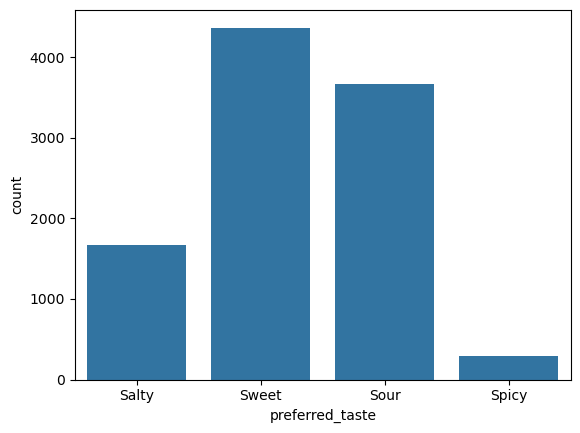

In [79]:
sns.countplot(x="preferred_taste", data=df)

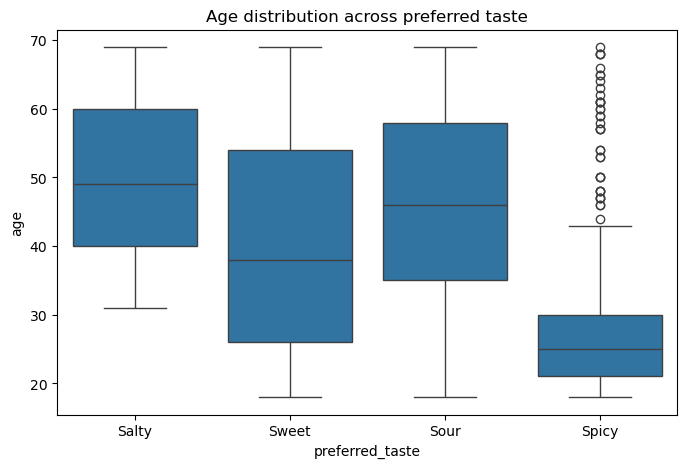

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x="preferred_taste", y="age", data=df)
plt.title("Age distribution across preferred taste")
plt.show()

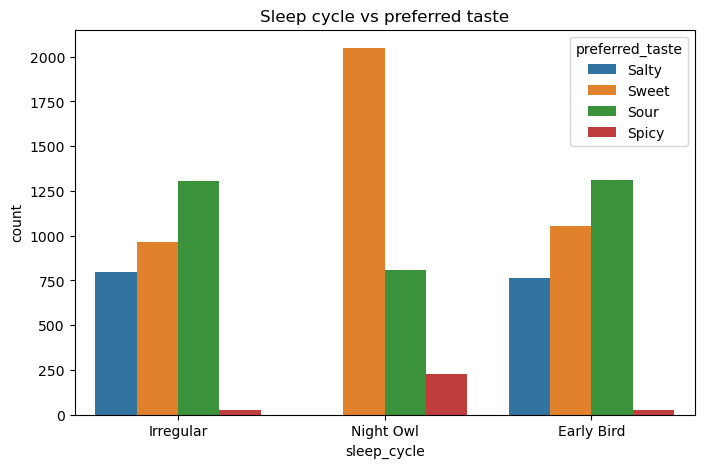

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(x="sleep_cycle", hue="preferred_taste", data=df)
plt.title("Sleep cycle vs preferred taste")
plt.show()

Text(0.5, 1.0, 'Missing Values Heatmap')

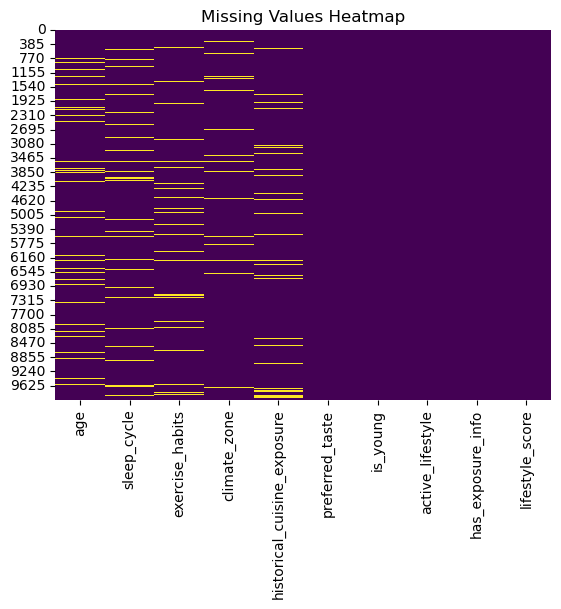

In [43]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")

In [45]:
X = df.drop(columns="preferred_taste")
y = df["preferred_taste"]

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [49]:
numeric_features = [
    "age",
    "has_exposure_info",
    "lifestyle_score"
]

categorical_features = [
    "sleep_cycle",
    "exercise_habits",
    "climate_zone",
    "historical_cuisine_exposure",
    "is_young",
    "active_lifestyle"
]

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [53]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [55]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [57]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [61]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42))
])

In [63]:
param_grid = {
    "clf__max_depth": [5, 10, 15, 20, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__criterion": ["gini", "entropy"]
}

In [65]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'has_exposure_info',
                                                                          'lifestyle_score']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sleep_cycle',
                                                                          'exercise_habits',
                                                                          'climate_zone',
                                                                          'historical_cuisine_exposure',
                                                                          'is_young',
                                                                          'active_lifestyle'])])),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [5, 10, 15, 20, None],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [67]:
y_pred = grid_search.predict(X_test)
y_pred

array(['Sour', 'Sweet', 'Sour', ..., 'Sweet', 'Sour', 'Salty'],
      dtype=object)

In [69]:
from sklearn.metrics import accuracy_score, classification_report

In [71]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best params: {grid_search.best_params_}")
print(f"\nTest accuracy: {accuracy * 100:.4f}")
print("\nClassification report:")
print("\n",report)

Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10}

Test accuracy: 90.5000

Classification report:

               precision    recall  f1-score   support

       Salty       0.85      0.98      0.91       335
        Sour       0.88      0.91      0.89       733
       Spicy       0.86      0.75      0.80        59
       Sweet       0.95      0.89      0.92       873

    accuracy                           0.91      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.91      0.91      0.90      2000



In [73]:
from sklearn.tree import plot_tree


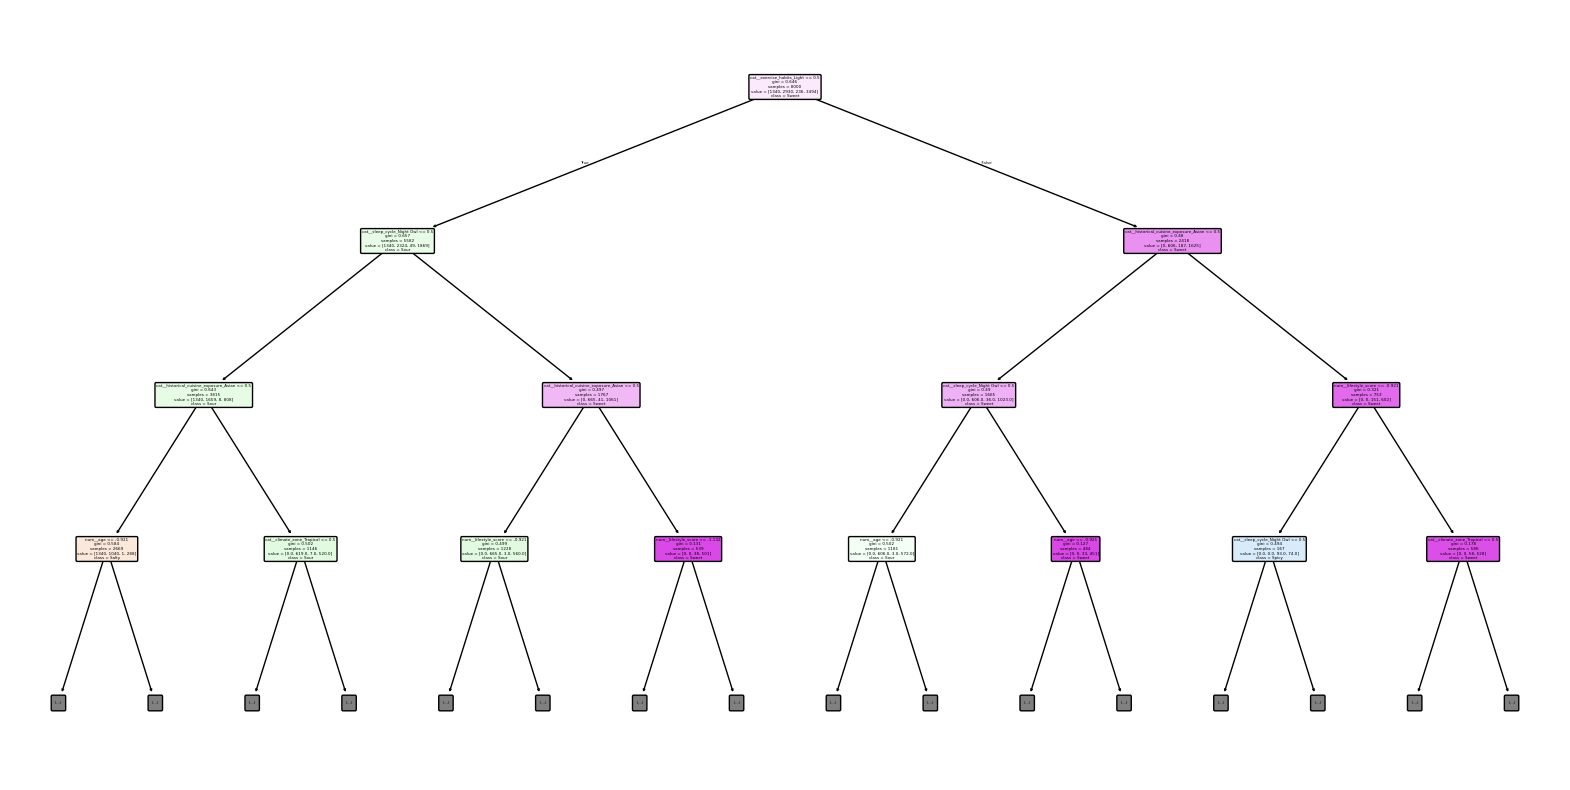

In [75]:
best_tree = grid_search.best_estimator_.named_steps["clf"]

# Plot
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    filled=True,
    rounded=True,
    class_names=grid_search.classes_,
    feature_names=grid_search.best_estimator_.named_steps["preprocessor"].get_feature_names_out(),
    max_depth=3   # Top 3 levels for clarity
)
plt.show()